# Twitter Sentiment Classification

The Twitter Sentiment Analysis Dataset contains 1,578,612 classified tweets, each row is marked as 1 for positive sentiment and 0 for negative sentiment.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('/home/varduhi/Documents/Sentiment_data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv', error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [3]:
#looking at first few rows
data.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [4]:
#info on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578612 entries, 0 to 1578611
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ItemID           1578612 non-null  int64 
 1   Sentiment        1578612 non-null  int64 
 2   SentimentSource  1578612 non-null  object
 3   SentimentText    1578612 non-null  object
dtypes: int64(2), object(2)
memory usage: 48.2+ MB


In [5]:
#checking Sentiment column, to see values, because this is going to be our dependent variable
data['Sentiment'].unique()

array([0, 1])

#### Exploring Data

In [6]:
#to look at data with positive sentiment
positive = data[data['Sentiment'] == 1]

In [7]:
#to look at data woth negative sentiment
negative = data[data['Sentiment'] == 0]

In [8]:
positive.head()

,ItemID,Sentiment,SentimentSource,SentimentText
2,3,1,Sentiment140,omg its already 7:30 :O
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,Sentiment140,handed in my uniform today . i miss you ...
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)
11,12,1,Sentiment140,thanks to all the haters up in my face a...


In [9]:
negative.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
5,6,0,Sentiment140,or i just worry too much?


#### Looking at dependent variables. Checking whether our data is balanced or not.

In [10]:
print('Positive percentage =', (len(positive) / len(data) * 100), '%' )

Positive percentage = 50.055175052514485 %


In [11]:
print('Negative percentage =', (len(negative) / len(data) * 100), '%' )

Negative percentage = 49.944824947485515 %


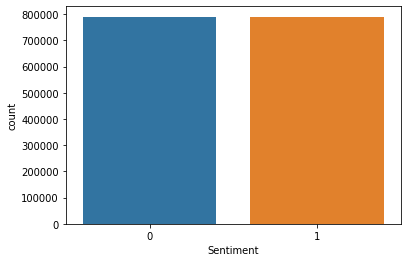

In [12]:
sns.countplot(data['Sentiment'])

As we see we have balanced lables.

#### CountVectorizer, transforming our text inputs into matrix

Convert a collection of text documents to a matrix of token counts

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()

In [15]:
pos_neg_countvectorizer = vectorizer.fit_transform(data['SentimentText'])

In [ ]:
#vectorizer.get_feature_names()

In [16]:
pos_neg_countvectorizer.shape

(1578612, 685468)

Number of rowes, and features. We created our features, we translated 1 column into 685468 columns.

**Implementing Multinomial Naive Bayes algorithm**

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
NB_clasifier = MultinomialNB()

In [19]:
lable = data['Sentiment']

Train / Test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = pos_neg_countvectorizer
y = lable

In [22]:
x.shape

(1578612, 685468)

In [23]:
y.shape

(1578612,)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
NB_clasifier.fit(x_train, y_train)

MultinomialNB()

#### Evaluating the model

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_predict_train = NB_clasifier.predict(x_train)

In [28]:
cm = confusion_matrix(y_train, y_predict_train)

In [37]:
train_score = NB_clasifier.score(x_train, y_train)

In [38]:
#accuracy score
train_score

0.8325189308007276

In [29]:
#confusion metric for training
cm

array([[546769,  83996],
       [127514, 504610]])

In [36]:
#CR for testing
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84    630765
           1       0.86      0.80      0.83    632124

    accuracy                           0.83   1262889
   macro avg       0.83      0.83      0.83   1262889
weighted avg       0.83      0.83      0.83   1262889



We have 83% accuracy score. As we see we better predict 1 than 0.

In [39]:
#for testing dataset
y_predict_test = NB_clasifier.predict(x_test)

In [40]:
cm_test = confusion_matrix(y_test, y_predict_test)

In [41]:
cm_test

array([[128654,  29016],
       [ 40263, 117790]])

In [43]:
test_score = NB_clasifier.score(x_test, y_test)

In [44]:
#test accuracy score
test_score

0.7805703100502656

In [42]:
#CR for testing
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79    157670
           1       0.80      0.75      0.77    158053

    accuracy                           0.78    315723
   macro avg       0.78      0.78      0.78    315723
weighted avg       0.78      0.78      0.78    315723



For testing Dataset we have lower accuracy score 78%, and this time we predict 1 better than 0.

Noe we will test our model with data that we will create.

In [45]:
testing_sample = ['I am so grateful for this opportunity', 'this is actually not what I was expected']

In [46]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [47]:
test_predict = NB_clasifier.predict(testing_sample_countvectorizer)

In [48]:
test_predict

array([1, 0])

As we see our Model has a right prediction. My first sentence has a positive sentiment 2nd one negative.